__*Written by Sebastian Matiz*__

__*Exercise 1 ECE-443*__

# 1) *Housing price data set.* 
In this exercise we explore a dataset related to housing price
prediction.

In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

In [470]:
housing_df = pd.read_csv('housing.csv')

__a)__ Printing __shape__, __axes__, and __dtypes__.

In [471]:
print ("shape:", housing_df.shape)

shape: (1460, 19)


In [472]:
print ("axes:", housing_df.axes)

axes: [RangeIndex(start=0, stop=1460, step=1), Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'BldgType',
       'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')]


In [473]:
print ("dtypes:",housing_df.dtypes)

dtypes: Id                int64
MSSubClass        int64
LotFrontage     float64
LotArea           int64
Street           object
BldgType         object
OverallQual       int64
YearBuilt         int64
TotalBsmtSF       int64
FullBath          int64
HalfBath          int64
Fireplaces        int64
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars        int64
GarageArea        int64
SalePrice         int64
dtype: object



__b)__ Printing first 10 rows of __housing_df__.

In [474]:
print (housing_df.head(10))

   Id  MSSubClass  LotFrontage  LotArea Street BldgType  OverallQual  \
0   1          60         65.0     8450   Pave     1Fam            7   
1   2          20         80.0     9600   Pave     1Fam            6   
2   3          60         68.0    11250   Pave     1Fam            7   
3   4          70         60.0     9550   Pave     1Fam            7   
4   5          60         84.0    14260   Pave     1Fam            8   
5   6          50         85.0    14115   Pave     1Fam            5   
6   7          20         75.0    10084   Pave     1Fam            8   
7   8          60          NaN    10382   Pave     1Fam            7   
8   9          50         51.0     6120   Pave     1Fam            7   
9  10         190         50.0     7420   Pave   2fmCon            5   

   YearBuilt  TotalBsmtSF  FullBath  HalfBath  Fireplaces FireplaceQu  \
0       2003          856         2         1           0         NaN   
1       1976         1262         2         0           1    

__c)__ __housing_df__ includes 1460 samples.

__d)__ Based on my knowledge of the dataset and its stated usage, I think 
we are dealing with a supervised learning problem. This is because our data is already labeled. 

__e)__  This dataset contains 17 indpendent features.

Features:

    -MSSubClass  
    -LotFrontage  
    -LotArea 
    -Street 
    -BldgType
    -OverallQual
    -YearBuilt  
    -TotalBsmtSF  
    -FullBath  
    -HalfBath  
    -Fireplaces 
    -FireplaceQu
    -GarageType  
    -GarageYrBlt 
    -GarageFinish  
    -GarageCars  
    -GarageArea  
   

__f)__ This dataset contains 1 dependent features.

Features:

    -SalePrice

__g)__ There are 6 categorical values.

Features:


    -Street
    -BldgType
    -OverallQual     Ranges from (1,10)
    -FireplaceQu
    -GarageType
    -GarageFinish
  

__h)__ Plot SalePrice as a function of LotArea.

In [475]:
X = housing_df['LotArea'].to_numpy()
Y = housing_df['SalePrice'].to_numpy()

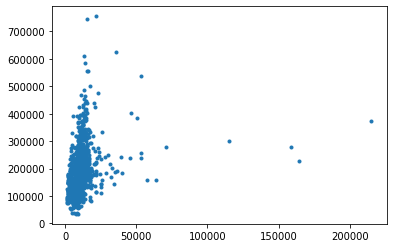

In [476]:
# Linear Scale
plt.plot(X, Y, '.')

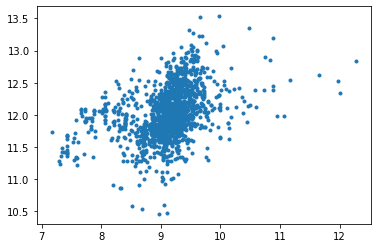

In [477]:
# Logorithmic Scale
plt.plot(np.log(X),np.log(Y),'.')

## __Analysis__  *(LotArea, SalePrice)*:

The plot using SalePrice as a function of LotArea does not seem to be a good fit for linear regression. The points seem to cluster together and there is a lot of variance in values of LotArea and the corresponding SalePrice. 

__i)__ How many samples have a GarageArea greater than zero? For those samples,
plot SalePrice as a function of GarageArea.

In [478]:
gA = housing_df['GarageArea'].to_numpy()
nonZero = np.nonzero(gA)
gA = gA[nonZero]

sP = housing_df['SalePrice'].to_numpy()
sP = sP[nonZero]

In [479]:
# Printing number of nonzero GarageArea samples
print ("nonzero GarageArea sample",len(np.transpose(nonZero)))

nonzero GarageArea sample 1379


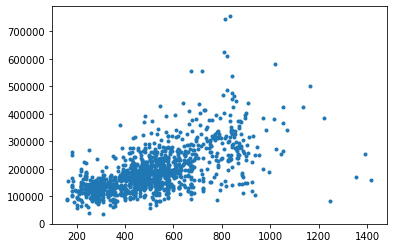

In [480]:
# Linear Scale
plt.plot(gA, sP, '.')

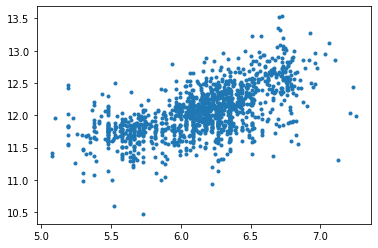

In [481]:
# Logorithmic Scale
plt.plot(np.log(gA), np.log(sP), '.')

## __Analysis__  *(GarageArea, SalePrice)*:

The plot using SalePrice as a function of GarageArea does seem to fit linear regression better than LotArea. We could use GarageArea as a predictor for SalePrice but as we see in the linear graph, there is a lot of variance from GarageArea(800:1400) to the corresponding SalePrice values. Hence, GarageArea may not be the best reliable predictor for SalePrice.

# 2) *Linear regression* 
In this exercise we explore a dataset related to housing price
prediction.

In [482]:
df_data = pd.read_csv('exercise1_data.csv')

X = df_data[['X1','X2','X3','X4']].to_numpy()
Y = df_data['Y'].to_numpy()
Y = np.expand_dims(Y,axis=1)

In [483]:
# a)
# print number of samples, m

print ("Number of samples:", df_data.shape[0])

Number of samples: 1000


__b)__

This is important because adding a column of one's allows us to select an intercept 
for our linear regression. Perhaps the 'line' of best fit does not pass through the origin.

I ended up not adding a column of all ones because I decided to just update the scalar intercept value b, 
and just adding it to Y_pred. This is easily done by just adding Y_pred + b. Hence we do not need to add a whole 
new column. This ultimately saves space. 


In [484]:
# add all ones col to data matrix
# Using DataFrame.insert() to add a column

# onesCol = np.ones((1000,), dtype=float)

# X = np.insert(X, 4, onesCol, axis = 1)

In [485]:
#c) Standard Gradient Descent
def derivFunc(X_i, Y_delta):       
    sum = 0
    for x, y in zip(X_i, Y_delta):  # this function returns ∇J(θ)_i = 2*∑(Y_pred - Y_actual)*X_i
        sum += x*y
    return 2*sum

def lossFunc(delta):  # currLoss = ∑((Y_pred - Y_actual)^2)
    sum = 0
    for curr in delta:
        sum += (curr ** 2)
    return sum

def GD(intercept, lR, epochs):
    mCoeff = [0.,0.,0.,0.]    # m_1, ... , m_4
    dmCoeff  = [0.,0.,0.,0.]  # ∇J(θ)_1, ... , ∇J(θ)_4
    learningRate = lR
    b = intercept             # starting intercept
    epochs = epochs
    loss = []
    X_t = X.transpose()
    
    for x in range(epochs):
        Y_pred = [0]
        for currCol, currM in zip(X_t, mCoeff): # Y_pred = m_1*X_1 + m_2*X_2 + m_3*X_3 + m_4*X_4 + b
            Y_pred += (currM*currCol)   
        Y_pred = Y_pred.transpose() + b         # add intercept
        
        Y_pred = np.reshape(Y_pred, (1000,1))
        Y_delta = np.subtract(Y_pred,Y)         # Y_delta = Y_pred - Y_actual
        currLoss = lossFunc(Y_delta)            # currLoss = ∑((Y_pred - Y_actual)^2)
        loss.append(currLoss)                      

        index = 0
        for currCol in X_t:                     # calculating derivative of loss function WRT m_i
            currCol = currCol.transpose()     
            currCol = np.reshape(currCol, (1000,1))
            dmCoeff[index] = derivFunc(currCol, Y_delta) # ∇J(θ)_i = 2*∑(Y_pred - Y_actual)*X_i
            index+=1
            
        db = (2)*sum(Y_delta)                  # calculating derivative of loss function WRT b
        
        for index in range(len(mCoeff)):
            mCoeff[index] -= learningRate * dmCoeff[index]  # updating m coeff's after each epoch
        b -= learningRate * db                              # updating b coeff after each epoch (intercept)
    return loss, mCoeff, b

In [486]:
start_time = time.time()
loss, mCoeff, b = GD(1, .1/1000.0, 1000)
print("--- %s seconds ---" % (time.time() - start_time))
print ('Model: ', float(mCoeff[0]),
       'x_1 + ', float(mCoeff[1]), 
       'x_2 + ', float(mCoeff[2]), 
       'x_3 + ', float(mCoeff[3]), 
       'x_4 + ', float(b))

--- 4.398761987686157 seconds ---
Model:  10.000000000000004 x_1 +  0.5000000000000022 x_2 +  3.000000000000001 x_3 +  -9.999999999999996 x_4 +  4.999999999999996


[239688.40836189] [4.01776321e-26]


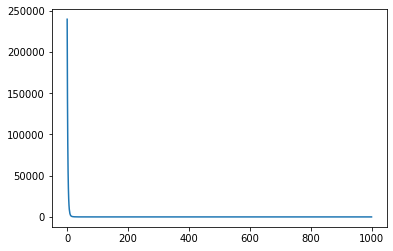

In [487]:
plt.plot(loss)
print(loss[0], loss[999])

In [488]:
# d)
start_time = time.time()
loss, mCoeff, b = GD(1, .01/1000.0, 1000)
print("--- %s seconds ---" % (time.time() - start_time))
print ('Model: ', float(mCoeff[0]),
       'x_1 + ', float(mCoeff[1]), 
       'x_2 + ', float(mCoeff[2]), 
       'x_3 + ', float(mCoeff[3]), 
       'x_4 + ', float(b))

--- 4.421176910400391 seconds ---
Model:  10.000023010456516 x_1 +  0.5019612338801085 x_2 +  3.0000492101662033 x_3 +  -9.999865586123978 x_4 +  4.996891447128418


[239688.40836189] [0.00466282]


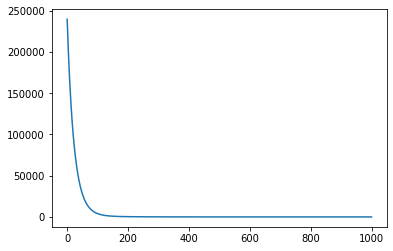

In [489]:
plt.plot(loss)
print(loss[0], loss[999])

The loss is minimized at a lower rate as compared to the plot in part c. This can be attributed to the smaller learning rate.

In [490]:
# e)
# for Stochastic Gradient Descent we are implementing the Gradient Descent algorithm in batches to reduce computation
# let us create batch size equal to 1000/40 = 25
def getBatchIndicies(size, maxValue): # The batch indicies are decided at random hence it is stochastic
    start = random.randint(0, maxValue-size)
    finish = start + size
    return start, finish

# Stochastic Gradient Descent
def SGD(intercept, lR, epochs, batchSize: float):
    mCoeff = [0.,0.,0.,0.]   # m_1, ... , m_4
    dmCoeff  = [0.,0.,0.,0.] # ∇J(θ)_1, ... , ∇J(θ)_4
    learningRate = lR
    b = intercept            # starting intercept
    epochs = epochs
    loss = []
    X_t = X.transpose()
    for x in range(epochs):
        bStart, bEnd = getBatchIndicies(batchSize, 1000)
        Y_pred = [0]
        for currCol, currM in zip(X_t, mCoeff):        # Y_pred = m_1*X_1 + m_2*X_2 + m_3*X_3 + m_4*X_4 + b
            Y_pred += (currM*currCol[bStart:bEnd])
        Y_pred = Y_pred.transpose() + b                # add intercept
        
        Y_pred = np.reshape(Y_pred, (batchSize,1))
        Y_delta = np.subtract(Y_pred,Y[bStart:bEnd])   # Y_delta = Y_pred - Y_actual
        currLoss = lossFunc(Y_delta)                   # currLoss = ∑((Y_pred - Y_actual)^2)
        loss.append(currLoss)

        index = 0
        for currCol in X_t:                            # calculating derivative of loss function WRT m_i
            currCol = currCol.transpose()
            currCol = np.reshape(currCol[bStart:bEnd], (batchSize,1))
            dmCoeff[index] = derivFunc(currCol, Y_delta) # ∇J(θ)_i = 2*∑((Y_pred - Y_actual)X_i)
            index+=1
            
        db = (2)*sum(Y_delta)
        
        for index in range(len(mCoeff)):
            mCoeff[index] -= learningRate * dmCoeff[index]   # updating m coeff's after each epoch
        b -= learningRate * db                               # updating b coeff after each epoch (intercept)
    return loss, mCoeff, b 
        
        

In [491]:
start_time = time.time()
loss, mCoeff, b = SGD(1, .01, 1000, 25)
print("--- %s seconds ---" % (time.time() - start_time))
print ('Model: ', float(mCoeff[0]),
       'x_1 + ', float(mCoeff[1]), 
       'x_2 + ', float(mCoeff[2]), 
       'x_3 + ', float(mCoeff[3]), 
       'x_4 + ', float(b))

--- 0.14607691764831543 seconds ---
Model:  10.0 x_1 +  0.5000000000000002 x_2 +  3.0000000000000004 x_3 +  -10.0 x_4 +  5.000000000000001


[4218.58060155] [1.75025095e-28]


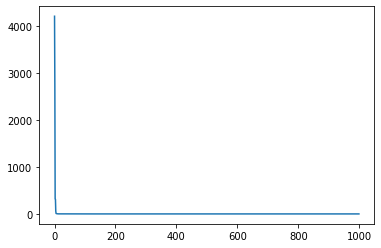

In [492]:
plt.plot(loss)
print(loss[0], loss[999])

In [493]:
# f)
start_time = time.time()
loss, mCoeff, b = SGD(1, .001, 1000, 25)
print("--- %s seconds ---" % (time.time() - start_time))
print ('Model: ', float(mCoeff[0]),
       'x_1 + ', float(mCoeff[1]), 
       'x_2 + ', float(mCoeff[2]), 
       'x_3 + ', float(mCoeff[3]), 
       'x_4 + ', float(b))

--- 0.14504694938659668 seconds ---
Model:  10.000000000319492 x_1 +  0.5000000749901318 x_2 +  2.999999999658091 x_3 +  -9.999999997646631 x_4 +  4.999999888322696


[3278.59399369] [1.54347447e-13]


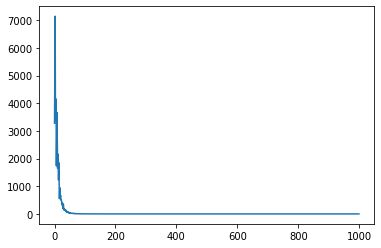

In [494]:
plt.plot(loss)
print(loss[0], loss[999])

The loss is minimized at a lower rate as compared to the plot in part e. This can be attributed to the smaller learning rate.

__g)__

The plots of part c and e are identically shaped, the only difference is the intitial values of loss. The initial values of loss for Standard Gradient Descent were much higher as compared to the initial values for Stochastic Gradient Descent. This can be attributed to our batch sizes. We sum up the loss of 1,000 samples in plot C vs summing up the loss of 25 samples. 

## Final Plot Analysis:
First off, all of the graphs seemed to converge on the model: y = 10.0*x_1 + 0.5*x_2 + 3.0*x_3 + -10.0*x_4 + 5.0


Secondly, convergence to these coefficients was slower when the step size was smaller which is expected.
It was interesting that the plots for Standard Gradient Descent had a very small learning rate, while in the Stochastic Gradient Descent a higher learning rate was chosen. Was this done for a particular reason?

Also, for the Stochastic Gradient Descent plots as compared to the Standard Gradient Descent, jagged edges were introduced in our loss function plot. This can be explained because since each epoch experiences different batches, higher values for the loss can be seen as compared to previous values of loss. 

It is also shown that the same results can be seen with much less computation when using Stochastic Gradient Descent.
Each epoch with stochastic gradient descent works on a batch of 25 samples, while standard gradient descent works on a batch of a 1,000 samples. I also timed the execution speed for Stochastic Gradient Descent and Gradient Descent and found significant speed up in Stochastic Gradient Descent. 

Lastly, I would like to show why picking good parameters for SGD is important. For example, if we pick a step size too large we could diverge instead of converge on our optimization of our loss function. 

In [495]:
# example of divergance due to step size being .1 which is too large
start_time = time.time()
loss, mCoeff, b = SGD(1, .1, 1000, 25)
print("--- %s seconds ---" % (time.time() - start_time))
print ('Model: ', float(mCoeff[0]),
       'x_1 + ', float(mCoeff[1]), 
       'x_2 + ', float(mCoeff[2]), 
       'x_3 + ', float(mCoeff[3]), 
       'x_4 + ', float(b))

--- 0.14771628379821777 seconds ---
Model:  nan x_1 +  nan x_2 +  nan x_3 +  nan x_4 +  nan


/var/folders/s8/h_031z5d7mbf8ckkr3tnb9rw0000gn/T/ipykernel_19769/3409338726.py:11: RuntimeWarning: overflow encountered in add
  sum += (curr ** 2)
/var/folders/s8/h_031z5d7mbf8ckkr3tnb9rw0000gn/T/ipykernel_19769/3409338726.py:11: RuntimeWarning: overflow encountered in square
  sum += (curr ** 2)
/var/folders/s8/h_031z5d7mbf8ckkr3tnb9rw0000gn/T/ipykernel_19769/3409338726.py:5: RuntimeWarning: overflow encountered in add
  sum += x*y
/var/folders/s8/h_031z5d7mbf8ckkr3tnb9rw0000gn/T/ipykernel_19769/1915051508.py:37: RuntimeWarning: overflow encountered in add
  db = (2)*sum(Y_delta)
/var/folders/s8/h_031z5d7mbf8ckkr3tnb9rw0000gn/T/ipykernel_19769/1915051508.py:23: RuntimeWarning: invalid value encountered in add
  Y_pred = Y_pred.transpose() + b                # add intercept


[5182.481505] [nan]


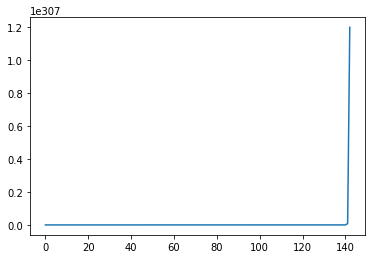

In [496]:
plt.plot(loss)
print(loss[0], loss[999])